## 전처리 실습
- 표준 스케일링

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pt
%matplotlib inline

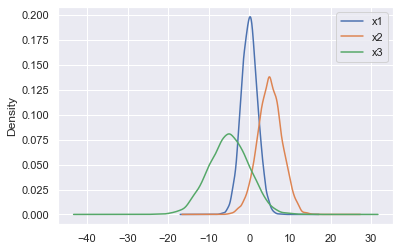

In [29]:
# Generating normally distributed data : 정규 분표 데이터 생성
df = pd.DataFrame({
    'x1' :np.random.normal(0,2,10000), #평균 0,표준편차 2
    'x2'  :np.random.normal(5,3,10000),
    'x3' :np.random.normal(-5,5,10000),
})
df.plot.kde()
from sklearn.preprocessing import StandardScaler

In [30]:
df

,x1,x2,x3
0,-0.079087,0.158551,-10.892777
1,0.931339,4.313091,2.960766
2,1.437008,5.714789,-3.422730
3,1.002160,8.747073,-5.359252
4,-2.540280,8.407885,-14.697779
...,...,...,...
9995,-0.462098,7.911395,-5.666699
9996,-2.074663,0.779273,-12.972917
9997,-2.976505,4.881732,-11.156402
9998,0.353645,1.873982,0.295306


In [31]:
df.head(10) # 앞에서부터 10개 출력

,x1,x2,x3
0,-0.079087,0.158551,-10.892777
1,0.931339,4.313091,2.960766
2,1.437008,5.714789,-3.422730
3,1.002160,8.747073,-5.359252
4,-2.540280,8.407885,-14.697779
5,4.903350,10.199619,-4.982672
6,-0.089825,2.686289,-3.412427
7,2.652338,2.047921,-4.878375
8,-4.241553,3.041734,-7.435505
9,2.235096,5.005988,-11.650764


<AxesSubplot:ylabel='Density'>

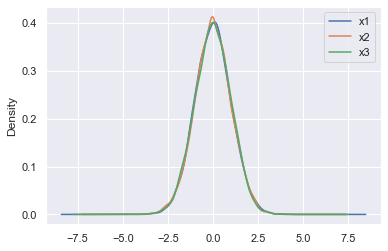

In [32]:
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns =['x1','x2','x3'])
df.plot.kde()

In [33]:
df

,x1,x2,x3
0,-0.043054,-1.631976,-1.182533
1,0.455295,-0.243880,1.607627
2,0.704694,0.224449,0.321965
3,0.490224,1.237582,-0.068058
4,-1.256932,1.124254,-1.948876
...,...,...,...
9995,-0.231958,0.958369,-0.129979
9996,-1.027286,-1.424583,-1.601481
9997,-1.472081,-0.053888,-1.235628
9998,0.170372,-1.058824,1.070793


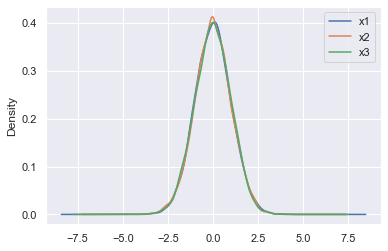

In [34]:
df.plot.kde();

<AxesSubplot:ylabel='Density'>

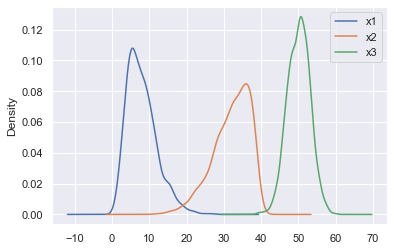

In [35]:
df = pd.DataFrame({
    'x1' :np.random.chisquare(8,1000), #평균 0,표준편차 2
    'x2'  :np.random.beta(8,2,1000)*40,
    'x3' :np.random.normal(50,3,1000),
})
df.plot.kde()

<AxesSubplot:ylabel='Density'>

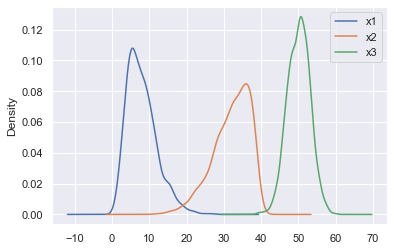

In [36]:
df.plot.kde()

In [37]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()
items = np.array(['TV','냉장고','컴퓨터','냉장고','에어콘','에어콘','선풍기'])
pd.get_dummies(items)

KeyError: "None of [Index(['gender_tf'], dtype='object')] are in the [columns]"

## 최소 최대 스케일링

In [38]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler는 매우다른 스케일의 범위를 0과 1사이로 변환
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])

<AxesSubplot:ylabel='Density'>

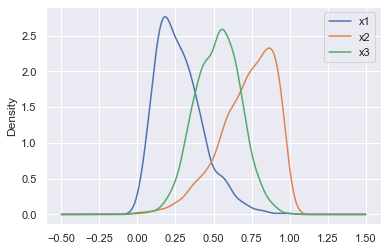

In [39]:
df.plot.kde()

In [40]:
df=pd.DataFrame({
    #Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20,1,1000),
np.random.normal(1,1,25)]),
    #Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30,1,1000),
                          np.random.normal(50,1,25)]),})
                          


In [41]:
from sklearn.preprocessing import RoustScaler

robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(df)
df= pd.DataFrame(data_tf, columns=['x1','x2'])

ImportError: cannot import name 'RoustScaler' from 'sklearn.preprocessing' (C:\Users\taddy\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

<AxesSubplot:ylabel='Density'>

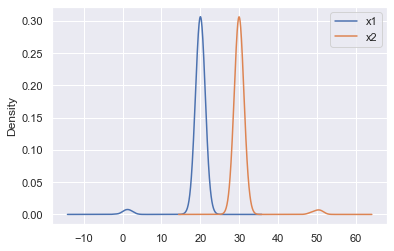

In [42]:
df.plot.kde()

## 텍스트 전처리

In [43]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer()#단어들의 카운트(출현 빈도(frequency))로 여러 문서들을 벡터화
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [46]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [49]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [51]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}